In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [3]:
ajax1 = pd.read_csv('AjaxEredivisie2021.csv')
print (ajax1.columns)

Index(['ranking', 'seasonId', 'seasonName', 'tournamentId',
       'tournamentRegionId', 'tournamentRegionCode', 'tournamentRegionName',
       'regionCode', 'tournamentName', 'tournamentShortName', 'firstName',
       'lastName', 'playerId', 'isActive', 'isOpta', 'teamId', 'teamName',
       'teamRegionName', 'playedPositions', 'age', 'height', 'weight',
       'positionText', 'apps', 'subOn', 'minsPlayed', 'rating', 'goal',
       'assistTotal', 'yellowCard', 'redCard', 'shotsPerGame',
       'aerialWonPerGame', 'manOfTheMatch', 'isManOfTheMatch',
       'playedPositionsShort', 'name', 'passSuccess'],
      dtype='object')


In [39]:
ajax1['goalpmin'] = ajax1['goal'] / ajax1['minsPlayed']

In [40]:
ajax1['goalpmatch'] = ajax1['goalpmin'] * 90

In [41]:
ajax1['newfullname']  = ajax1[['firstName', 'lastName']].agg('-'.join, axis=1)

In [42]:
#lets see some of the results of the table: filter the first 5 by 'ranking'
ajax1[(ajax1['ranking']<6)]

,ranking,seasonId,seasonName,tournamentId,tournamentRegionId,tournamentRegionCode,tournamentRegionName,regionCode,tournamentName,tournamentShortName,...,shotsPerGame,aerialWonPerGame,manOfTheMatch,isManOfTheMatch,playedPositionsShort,name,passSuccess,goalpmin,newfullname,goalpmatch
0,1,8187,2020/2021,13,155,nl,Netherlands,rs,Eredivisie,NE,...,2.281250,0.468750,7,False,"AM(CLR),FW",Dusan Tadic,76.566757,0.005564,Dusan-Tadic,0.500795
1,2,8187,2020/2021,13,155,nl,Netherlands,ci,Eredivisie,NE,...,2.705882,4.176471,4,False,FW,Sébastien Haller,71.933472,0.006415,Sébastien-Haller,0.577334
2,3,8187,2020/2021,13,155,nl,Netherlands,nl,Eredivisie,NE,...,1.566667,1.233333,0,False,DMC,Ryan Gravenberch,87.201528,0.001197,Ryan-Gravenberch,0.107741
3,4,8187,2020/2021,13,155,nl,Netherlands,nl,Eredivisie,NE,...,1.535714,1.000000,3,False,M(CL),Davy Klaassen,85.402685,0.005540,Davy-Klaassen,0.498615
4,5,8187,2020/2021,13,155,nl,Netherlands,ar,Eredivisie,NE,...,1.520000,2.080000,1,False,D(CL),Nicolás Tagliafico,82.662284,0.000498,Nicolás-Tagliafico,0.044776


<AxesSubplot:xlabel='newfullname'>

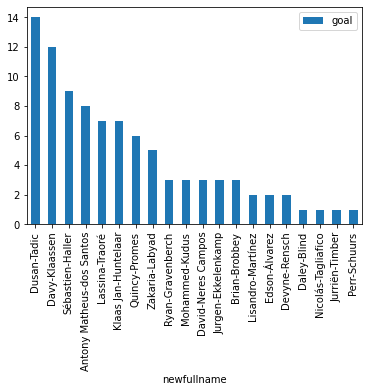

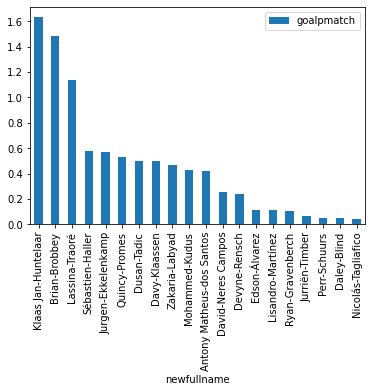

In [43]:
#GOALS ANALYSIS

#now lets show the ranking of players with more goals
ajax2=ajax1[(ajax1['goal']>0)]
ajax2.sort_values(by=['goal'], ascending=False).plot.bar(x='newfullname', y='goal')

#but lets compare it with the ranking of players with more goals PER MINUTE
ajax2.sort_values(by=['goalpmatch'], ascending=False).plot.bar(x='newfullname', y='goalpmatch')

We can see the player with most goals was 'Dusan Tadic' with 14 goals, nevertheless the most effective was 'Klaas Jan Huntelaar' with 1.6 goals per match (1.6 goals for every 90 mins played).

<AxesSubplot:xlabel='newfullname'>

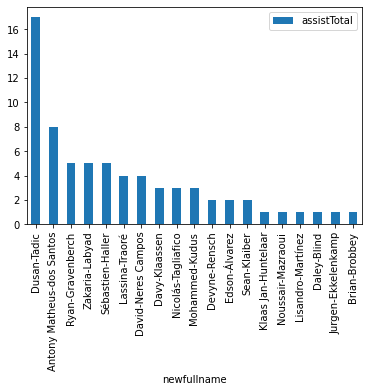

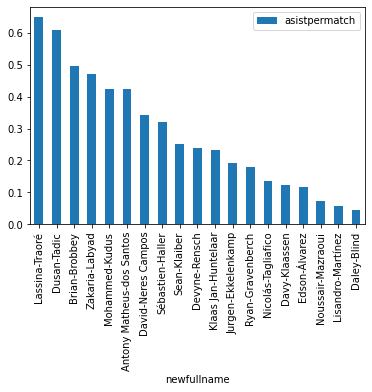

In [44]:
#ASISTS ANALYSIS

ajax1['asistpermatch'] = ajax1['assistTotal'] / (ajax1['minsPlayed']/90)

#lets show the ranking of players with more assistans
ajax3=ajax1[(ajax1['assistTotal']>0)]
ajax3.sort_values(by=['assistTotal'], ascending=False).plot.bar(x='newfullname', y='assistTotal')

#but lets compare it with the ranking of players with more goals PER MINUTE
ajax3.sort_values(by=['asistpermatch'], ascending=False).plot.bar(x='newfullname', y='asistpermatch')

Dusan Tadic is not only the player with more assitants, but also the 2nd most assistans per match.

In [71]:
#GOALS PER POSITION ANALYSIS

#first I need to group the positions by goal
ajax4 =pd.pivot_table(ajax1, index=["positionText"], values=["goal"], aggfunc=py.sum)
ajax4 

,goal
positionText,
Defender,6
Forward,62
Goalkeeper,0
Midfielder,25


In [70]:
# now I need to transform this pivot in a dataframe
ajax5 = ajax4.reset_index()
ajax5 

,positionText,goal
0,Defender,6
1,Forward,62
2,Goalkeeper,0
3,Midfielder,25


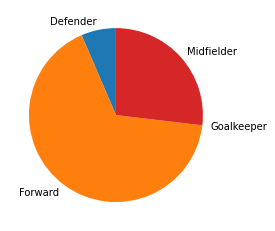

In [75]:
# finally with this new df I will plot the graphic in a pie
plt.pie(ajax5['goal'], labels = ajax5['positionText'], startangle = 90)
plt.show() 